In [1]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
shots = 256

# Load local account information
#IBMQ.save_account('cdad9ef01fbad88f5ee99fa7fc4cfb7b5eb8755c52fd1697690c6b680797a57384a80d5a6bfd5e99332b8ee8a58e74e3903034a7f4c19eb9d29b9e3da35aff0d')
IBMQ.load_account()

C:\Users\user\Downloads\anaconda\envs\IBMQ\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [2]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.providers.ibmq import least_busy
from qiskit.quantum_info import Statevector
from numpy import pi

# importing Qiskit
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

# import basic plot tools
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [3]:
# Problem 3

In [4]:
def qft(n):
    """n-qubit QFT the first n qubits in circuit"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cu1(np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT"
    return qc

def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circuit"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cu1(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT"
    return qc

In [5]:
# phi_1
qc_a = QuantumCircuit(4, 4)
for i in range(4):
    qc_a.h(i)
qc_a.rz(pi, 0)
qc_a.draw()

┌───┐┌────────┐
q_0: ┤ H ├┤ RZ(pi) ├
     ├───┤└────────┘
q_1: ┤ H ├──────────
     ├───┤          
q_2: ┤ H ├──────────
     ├───┤          
q_3: ┤ H ├──────────
     └───┘          
c: 4/═══════════════

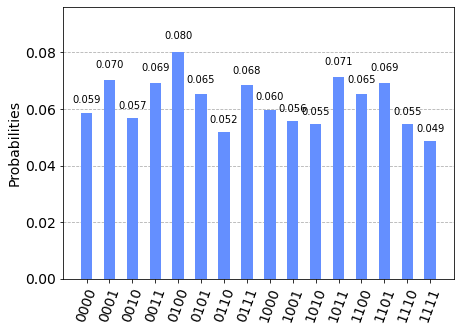

In [6]:
qc_a.measure([0, 1, 2, 3], [0, 1, 2, 3])
backend = Aer.get_backend('qasm_simulator')
results = execute(qc_a, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

In [7]:
#phi_2
qc_b = QuantumCircuit(4, 4)
for i in range(4):
    qc_b.h(i)
qc_b.rz(pi/2, 0)
qc_b.ry(pi, 1)
qc_b.draw()

┌───┐┌──────────┐
q_0: ┤ H ├┤ RZ(pi/2) ├
     ├───┤└┬────────┬┘
q_1: ┤ H ├─┤ RY(pi) ├─
     ├───┤ └────────┘ 
q_2: ┤ H ├────────────
     ├───┤            
q_3: ┤ H ├────────────
     └───┘            
c: 4/═════════════════

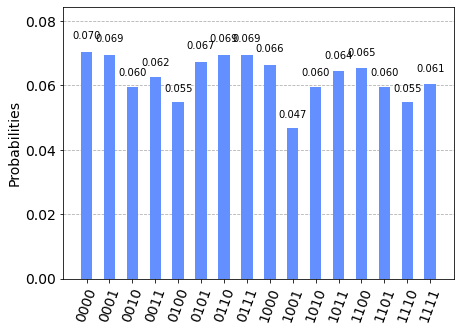

In [8]:
qc_b.measure([0, 1, 2, 3], [0, 1, 2, 3])
backend = Aer.get_backend('qasm_simulator')
results = execute(qc_b, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

In [9]:
# phi_3
qc_c = QuantumCircuit(4, 4)
for i in range(4):
    qc_c.h(i)
qc_c.rz(pi/4, 0)
qc_c.rz(pi/2, 1)
qc_c.rz(pi, 2)
qc_c.draw()

┌───┐┌──────────┐
q_0: ┤ H ├┤ RZ(pi/4) ├
     ├───┤├──────────┤
q_1: ┤ H ├┤ RZ(pi/2) ├
     ├───┤└┬────────┬┘
q_2: ┤ H ├─┤ RZ(pi) ├─
     ├───┤ └────────┘ 
q_3: ┤ H ├────────────
     └───┘            
c: 4/═════════════════

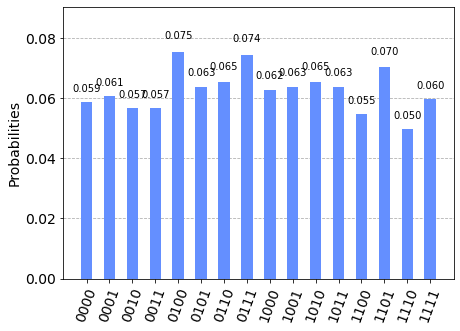

In [10]:
qc_c.measure([0, 1, 2, 3], [0, 1, 2, 3])
backend = Aer.get_backend('qasm_simulator')
results = execute(qc_c, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

In [11]:
# Amplitude Amplifier 

In [12]:
# phi_1
qc_a = QuantumCircuit(4, 4)
for i in range(4):
    qc_a.h(i)
qc_a.rz(pi, 0)

for i in range(4):
    qc_a.h(i)
for qubit in range(4):
    qc_a.x(qubit)
# Do multi-controlled-Z gate
qc_a.h(3)
qc_a.mct(list(range(3)), 3)  # multi-controlled-toffoli
qc_a.h(3)
# Apply transformation |11..1> -> |00..0>
for qubit in range(4):
    qc_a.x(qubit)
# Apply transformation |00..0> -> |s>
for qubit in range(4):
    qc_a.h(qubit)

qc_a.draw()

┌───┐┌────────┐┌───┐┌───┐     ┌───┐┌───┐     
q_0: ┤ H ├┤ RZ(pi) ├┤ H ├┤ X ├──■──┤ X ├┤ H ├─────
     ├───┤└─┬───┬──┘├───┤└───┘  │  ├───┤├───┤     
q_1: ┤ H ├──┤ H ├───┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤  ├───┤   ├───┤       │  ├───┤├───┤     
q_2: ┤ H ├──┤ H ├───┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤  ├───┤   ├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐
q_3: ┤ H ├──┤ H ├───┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
     └───┘  └───┘   └───┘└───┘└───┘└───┘└───┘└───┘
c: 4/═════════════════════════════════════════════

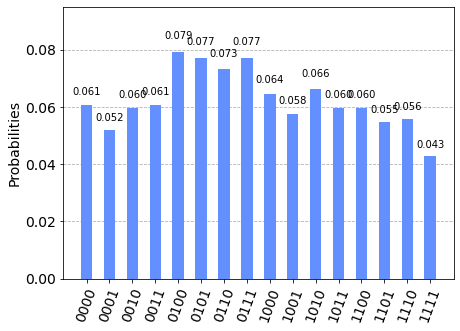

In [13]:
qc_a.measure([0, 1, 2, 3], [0, 1, 2, 3])
backend = Aer.get_backend('qasm_simulator')
results = execute(qc_a, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

In [14]:
# phi_2
qc_b = QuantumCircuit(4, 4)
for i in range(4):
    qc_b.h(i)
qc_b.rz(pi/2, 0)
qc_b.ry(pi, 1)

for i in range(4):
    qc_b.h(i)
for qubit in range(4):
    qc_b.x(qubit)
# Do multi-controlled-Z gate
qc_b.h(3)
qc_b.mct(list(range(3)), 3)  # multi-controlled-toffoli
qc_b.h(3)
# Apply transformation |11..1> -> |00..0>
for qubit in range(4):
    qc_b.x(qubit)
# Apply transformation |00..0> -> |s>
for qubit in range(4):
    qc_b.h(qubit)

qc_b.draw()

┌───┐┌──────────┐┌───┐┌───┐     ┌───┐┌───┐     
q_0: ┤ H ├┤ RZ(pi/2) ├┤ H ├┤ X ├──■──┤ X ├┤ H ├─────
     ├───┤└┬────────┬┘├───┤├───┤  │  ├───┤├───┤     
q_1: ┤ H ├─┤ RY(pi) ├─┤ H ├┤ X ├──■──┤ X ├┤ H ├─────
     ├───┤ └─┬───┬──┘ ├───┤└───┘  │  ├───┤├───┤     
q_2: ┤ H ├───┤ H ├────┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤   ├───┤    ├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐
q_3: ┤ H ├───┤ H ├────┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
     └───┘   └───┘    └───┘└───┘└───┘└───┘└───┘└───┘
c: 4/═══════════════════════════════════════════════

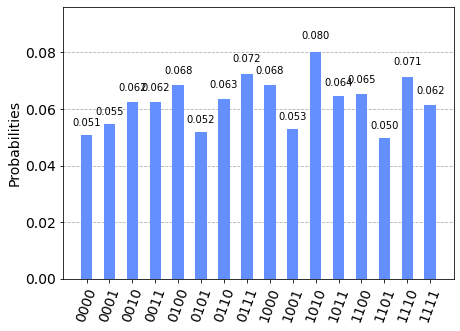

In [15]:
qc_b.measure([0, 1, 2, 3], [0, 1, 2, 3])
backend = Aer.get_backend('qasm_simulator')
results = execute(qc_b, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

In [16]:
# phi_3
qc_c = QuantumCircuit(4, 4)
for i in range(4):
    qc_c.h(i)
qc_c.rz(pi/4, 0)
qc_c.rz(pi/2, 1)
qc_c.rz(pi, 2)

for i in range(4):
    qc_c.h(i)
for qubit in range(4):
    qc_c.x(qubit)
# Do multi-controlled-Z gate
qc_c.h(3)
qc_c.mct(list(range(3)), 3)  # multi-controlled-toffoli
qc_c.h(3)
# Apply transformation |11..1> -> |00..0>
for qubit in range(4):
    qc_c.x(qubit)
# Apply transformation |00..0> -> |s>
for qubit in range(4):
    qc_c.h(qubit)

qc_c.draw()

┌───┐┌──────────┐┌───┐┌───┐     ┌───┐┌───┐     
q_0: ┤ H ├┤ RZ(pi/4) ├┤ H ├┤ X ├──■──┤ X ├┤ H ├─────
     ├───┤├──────────┤├───┤├───┤  │  ├───┤├───┤     
q_1: ┤ H ├┤ RZ(pi/2) ├┤ H ├┤ X ├──■──┤ X ├┤ H ├─────
     ├───┤└┬────────┬┘├───┤├───┤  │  ├───┤├───┤     
q_2: ┤ H ├─┤ RZ(pi) ├─┤ H ├┤ X ├──■──┤ X ├┤ H ├─────
     ├───┤ └─┬───┬──┘ ├───┤├───┤┌─┴─┐├───┤├───┤┌───┐
q_3: ┤ H ├───┤ H ├────┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
     └───┘   └───┘    └───┘└───┘└───┘└───┘└───┘└───┘
c: 4/═══════════════════════════════════════════════

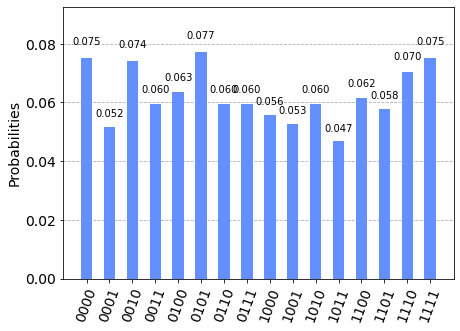

In [17]:
qc_c.measure([0, 1, 2, 3], [0, 1, 2, 3])
backend = Aer.get_backend('qasm_simulator')
results = execute(qc_c, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

In [18]:
# Fourier

In [19]:
# phi_1
qc_a = QuantumCircuit(4, 4)
for i in range(4):
    qc_a.h(i)
qc_a.rz(pi, 0)

q_1 = qc_a + qft_dagger(4)
q_1.measure([0, 1, 2, 3], [0, 1, 2, 3]) 
backend = Aer.get_backend('qasm_simulator')
answer_1 = execute(q_1, backend=backend).result().get_counts()
print(answer_1)

{'1000': 1024}


In [20]:
# phi_2
qc_b = QuantumCircuit(4, 4)
for i in range(4):
    qc_b.h(i)
qc_b.rz(pi/2, 0)
qc_b.ry(pi, 1)

q_2 = qc_b + qft_dagger(4)
q_2.measure([0, 1, 2, 3], [0, 1, 2, 3]) 
backend = Aer.get_backend('qasm_simulator')
answer_2 = execute(q_2, backend=backend).result().get_counts()
print(answer_2)

{'0100': 1024}


In [21]:
# phi_3
qc_c = QuantumCircuit(4, 4)
for i in range(4):
    qc_c.h(i)
qc_c.rz(pi/4, 0)
qc_c.rz(pi/2, 1)
qc_c.rz(pi, 2)

q_3 = qc_c + qft_dagger(4)
q_3.measure([0, 1, 2, 3], [0, 1, 2, 3]) 
backend = Aer.get_backend('qasm_simulator')
answer_3 = execute(q_3, backend=backend).result().get_counts()
print(answer_3)

{'0010': 1024}
